# An Analysis of Traffic Accidents in Madrid Involving Bicycles

Project Description goes here
## Acquiring the Data

### Downloading the Datasets

In [ ]:
!mkdir ../datasets
%cd ../datasets
!curl -L -o dataset_#1.xlsx https://datos.madrid.es/egob/catalogo/300110-[1-17:2]-accidentes-bicicleta.xlsx
%cd ../notebooks

### Importing the Datasets with *Pandas*
General imports.

In [50]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

Import each of the datasets and store them in a list. Then, concat the dfs and show head().

In [2]:
df_list = []
for i in range(9):
    curr_df = pd.read_excel("../datasets/dataset_" + str(2*i + 1) + ".xlsx")
    df_list.append(curr_df)
    
df = pd.concat([df_list[i] for i in range(9)], ignore_index=True)
df.head()

,FECHA,RANGO HORARIO,DIA SEMANA,DISTRITO,LUGAR ACCIDENTE,Nº,Nº PARTE,CPFA Granizo,CPFA Hielo,CPFA Lluvia,...,CPSV Hielo,CPSV Seca Y Limpia,Nº VICTIMAS *,TIPO ACCIDENTE,Tipo Vehiculo,TIPO PERSONA,SEXO,LESIVIDAD,Tramo Edad,* Nº VICTIMAS
0,2017-01-01,DE 6:00 A 6:59,DOMINGO,ARGANZUELA,CALLE DE TOLEDO NUM ...,120,2017/88,NO,NO,NO,...,NO,SI,1.0,CHOQUE CON OBJETO FIJO,BICICLETA,CONDUCTOR,MUJER,HG,DE 21 A 24 AÑOS,NaN
1,2017-01-02,DE 21:00 A 21:59,LUNES,SAN BLAS,CALLE DE MEQUINENZA NUM ...,14,2017/70,NO,NO,NO,...,NO,SI,1.0,CAÍDA BICICLETA,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 25 A 29 AÑOS,NaN
2,2017-01-03,DE 19:00 A 19:59,MARTES,CENTRO,CALLE DE LA ESCALINATA NUM ...,8,2017/307,NO,NO,NO,...,NO,SI,1.0,CAÍDA BICICLETA,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 18 A 20 AÑOS,NaN
3,2017-01-04,DE 21:00 A 21:59,MIERCOLES,CENTRO,CALLE DE LA CAVA DE SAN MIGUEL NUM ...,13,2017/124,NO,NO,NO,...,NO,NO,1.0,CAÍDA BICICLETA,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 30 A 34 ANOS,NaN
4,2017-01-05,DE 8:00 A 8:59,JUEVES,MONCLOA-ARAVACA,PUENTE DE LOS FRANCESES ...,0,2017/206,NO,NO,NO,...,NO,NO,1.0,CAÍDA BICICLETA,BICICLETA,CONDUCTOR,HOMBRE,HL,DE 45 A 49 AÑOS,NaN


Number of victims involved.

In [3]:
print(f"Victims in accidents involving bicycles between 2010 and 2018: {df.shape[0]}")

Victims in accidents involving bicycles between 2010 and 2018: 5524


## Cleaning and Preparing the Data
### Translating the *DataFrame*
Show columns.

In [4]:
df.columns

Index(['FECHA', 'RANGO HORARIO', 'DIA SEMANA', 'DISTRITO', 'LUGAR ACCIDENTE',
       'Nº', 'Nº PARTE', 'CPFA Granizo', 'CPFA Hielo', 'CPFA Lluvia',
       'CPFA Niebla', 'CPFA Seco', 'CPFA Nieve', 'CPSV Mojada', 'CPSV Aceite',
       'CPSV Barro', 'CPSV Grava Suelta', 'CPSV Hielo', 'CPSV Seca Y Limpia',
       'Nº VICTIMAS *', 'TIPO ACCIDENTE', 'Tipo Vehiculo', 'TIPO PERSONA',
       'SEXO', 'LESIVIDAD', 'Tramo Edad', '* Nº VICTIMAS'],
      dtype='object')

Translate columns.

In [5]:
eng_cols = ["Date", "Hour Range", "Day of Week", "District", "Location", "No.", "Report No.", "Weather: Hail", "Weather: Ice","Weather: Rain", "Weather: Fog", "Weather: Dry", "Weather: Snow", "Road: Wet", "Road: Oil", "Road: Mud", "Road: Gravel", "Road: Ice", "Road: Dry and clean", "Victims Involved", "Accident Type", "Vehicle Type", "Person Type", "Gender", "Harmfulness", "Age Range", "* Victims"]

df.columns = eng_cols

Some colums dont convey much info etc etc. For example

In [6]:
df.loc[df["Vehicle Type"].str.strip() != "BICICLETA", "Date"].count()

0

Lets drop unnecessary info.

In [7]:
df.drop(columns=["Day of Week", "Report No.", "Weather: Hail", "Vehicle Type", "* Victims"], inplace=True)
df.columns

Index(['Date', 'Hour Range', 'District', 'Location', 'No.', 'Weather: Ice',
       'Weather: Rain', 'Weather: Fog', 'Weather: Dry', 'Weather: Snow',
       'Road: Wet', 'Road: Oil', 'Road: Mud', 'Road: Gravel', 'Road: Ice',
       'Road: Dry and clean', 'Victims Involved', 'Accident Type',
       'Person Type', 'Gender', 'Harmfulness', 'Age Range'],
      dtype='object')

Now let's translate the values. See the unique values in the columns we want to translate:

In [8]:
for i in range(5, df.shape[1]):
    series = df.iloc[:, i]
    print(f"{series.name}: {series.unique()}")

Weather: Ice: ['NO' 'SI']
Weather: Rain: ['NO' 'SI']
Weather: Fog: ['NO' 'SI']
Weather: Dry: ['SI' 'NO']
Weather: Snow: ['NO' 'SI']
Road: Wet: ['NO' 'SI']
Road: Oil: ['NO' 'SI']
Road: Mud: ['NO' 'SI']
Road: Gravel: ['NO' 'SI']
Road: Ice: ['NO' 'SI']
Road: Dry and clean: ['SI' 'NO']
Victims Involved: [ 1.  2.  3. nan  6.  5.  4.]
Accident Type: ['CHOQUE CON OBJETO FIJO                  '
 'CAÍDA BICICLETA                         '
 'ATROPELLO                               '
 'COLISIÓN DOBLE                          '
 'CAÍDA MOTOCICLETA                       '
 'CAÍDA VIAJERO BUS                       '
 'COLISIÓN MÚLTIPLE                       '
 'OTRAS CAUSAS                            '
 'CAÍDA CICLOMOTOR                        '
 'VUELCO                                  ']
Person Type: ['CONDUCTOR' 'VIAJERO                                 '
 'TESTIGO                                 ']
Gender: ['MUJER' 'HOMBRE' 'NO ASIGNADO']
Harmfulness: ['HG                                      '
 

Strip the strings

In [ ]:
df.loc[:, "Accident Type":"Age Range"] = df.loc[:, "Accident Type":"Age Range"].transform(lambda x: x.str.strip())

Now create translation dictionaries to map to each column.

In [10]:
# Yes/No dict for the first columns
yn_dict = {"SI": "Yes", "NO": "No"}

# Translate first columns
for i in range(5, 16):
    df.replace({df.iloc[:, i].name: yn_dict}, inplace=True)

# English translation for the rest of the columns
acc_type_eng = ["Crash with static object", "Fall off bicycle", "Run over", "Double collision", "Fall off motorcycle", "Bus passenger fall", "Multiple collision", "Other causes", "Fall off moped", "Overturn"]
person_type_eng = ["Driver", "Accompanying", "Witness"]
gender_eng = ["W", "M", "Not assigned"]
harmfulness_eng = ["Seriously injured", "Slightly injured", "Uninjured", "Not assigned", "Killed"]
age_range_eng = ["21-24", "25-29", "18-20", "30-34", "45-49", "65-69", "35-39", "55-59", "50-54", "40-44", "10-14", "15-17", "6-9", "60-64", "0-5", "75+", "Unknown", "70-74"]
eng_list = [acc_type_eng, person_type_eng, gender_eng, harmfulness_eng, age_range_eng]

# Create the translation dictionaries and translate the rest of the columns
for i in range(17, df.shape[1]):
    series = df.iloc[:, i]
    esp_list = series.unique()
    dict = {k: v for k, v in zip(esp_list, eng_list[i - 17])}
    df.replace({series.name: dict}, inplace=True)

# Show head
df.head()

### Handling Missing Values
Let's check for null entries.

In [12]:
df.isnull().any()

Date                   False
Hour Range             False
District               False
Location               False
No.                    False
Weather: Ice           False
Weather: Rain          False
Weather: Fog           False
Weather: Dry           False
Weather: Snow          False
Road: Wet              False
Road: Oil              False
Road: Mud              False
Road: Gravel           False
Road: Ice              False
Road: Dry and clean    False
Victims Involved        True
Accident Type          False
Person Type            False
Gender                 False
Harmfulness            False
Age Range              False
dtype: bool

There is only null values in the "Victims" column. Let's see how many accident entries have a null value.

In [14]:
df["Victims Involved"].isnull().sum()

700

This is a significant amount of data ($\approx 13$%), so fill NaN values.
Let's see wich type of person was involved in this accidents.

In [16]:
df[df["Victims Involved"].isnull()].groupby("Person Type")["Date"].count()

Person Type
Accompanying      5
Driver          694
Witness           1
Name: Date, dtype: int64

For the sake of simplicity, let's suppose drivers were the only ones injured in their accidents, and accompanyings were involved in accidents with two victims. We'll discard all witnesses as they probably only reported a crash but weren't involved in it.

In [21]:

df.loc[df["Person Type"] == "Driver", "Victims Involved"] = df.loc[df["Person Type"] == "Driver", "Victims Involved"].fillna(1)

df.loc[df["Person Type"] == "Accompanying", "Victims Involved"] = df.loc[df["Person Type"] == "Accompanying", "Victims Involved"].fillna(2)

df.drop(index=df.index[df["Person Type"] == "Witness"], inplace=True)

### Rearanging the *DataFrame*
Is neccesary to rearange etc
#### Composing the *Weather* and *Road Condition* Columns
Rearange the weather and road conditions data so it is contained in two columns

In [22]:
df["Weather"] = df.apply(lambda row: row.iloc[5:10][row.iloc[5:10] == "Yes"].index[0].split(" ")[-1], axis="columns")

df["Road Condition"] = df.apply(lambda row: row.iloc[10:16][row.iloc[10:16] == "Yes"].index[0].split(" ", maxsplit=1)[-1], axis="columns")

IndexError: index 0 is out of bounds for axis 0 with size 0

The second operation gives an error because:

In [23]:
df.query("`Road: Wet` == 'No' & `Road: Oil` == 'No' & `Road: Mud` == 'No' & `Road: Gravel` == 'No' & `Road: Ice` == 'No' & `Road: Dry and clean` == 'No'")["Date"].count()

78

Lets suppose in those days the road was dry and clean:

In [24]:
df.loc[(df["Road: Wet"] == "No") & (df["Road: Oil"] == "No") & (df["Road: Mud"] == "No") & (df["Road: Gravel"] == "No") & (df["Road: Ice"] == "No") & (df["Road: Dry and clean"] == "No"), "Road: Dry and clean"] = "Yes"

df["Road Condition"] = df.apply(lambda row: row.iloc[10:16][row.iloc[10:16] == "Yes"].index[0].split(" ", maxsplit=1)[-1], axis="columns")

now we can drop this columns:

In [29]:
df.drop(columns=df.loc[:, "Weather: Ice":"Road: Dry and clean"].columns, inplace=True)

#### Creating a *PeriodIndex*
The *Date* column is already in datetime64 type:

In [30]:
df["Date"].head()

0   2017-01-01
1   2017-01-02
2   2017-01-03
3   2017-01-04
4   2017-01-05
Name: Date, dtype: datetime64[ns]

However, the *Hour Range* column needs to be formatted. Lets get the start hour of the range and rename the column to *Hour*

In [31]:
df["Hour Range"].head()

0      DE 6:00 A 6:59
1    DE 21:00 A 21:59
2    DE 19:00 A 19:59
3    DE 21:00 A 21:59
4      DE 8:00 A 8:59
Name: Hour Range, dtype: object

In [32]:
df["Hour Range"] = df["Hour Range"].str.extract("([0-9]+)").astype("uint8")
df.rename(columns={"Hour Range": "Hour"}, inplace=True)
df["Hour"].head()

0     6
1    21
2    19
3    21
4     8
Name: Hour, dtype: uint8

First, create a *DatetimeIndex* from the *Date* column to access the data separately (year, month, and day).

In [33]:
date_index = pd.DatetimeIndex(df["Date"])
date_index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-05', '2017-01-05', '2017-01-05',
               '2017-01-06', '2017-01-06',
               ...
               '2010-12-05', '2010-12-11', '2010-12-11', '2010-12-12',
               '2010-12-19', '2010-12-20', '2010-12-20', '2010-12-22',
               '2010-12-23', '2010-12-27'],
              dtype='datetime64[ns]', name='Date', length=5522, freq=None)

Now, create a *PeriodIndex* adding data from the *Hour* column and set it as index.

In [34]:
period_index = pd.PeriodIndex(year=date_index.year.values, month=date_index.month.values, day=date_index.day.values, hour=df["Hour"], freq="H")
df.index = period_index
df.index

PeriodIndex(['2017-01-01 06:00', '2017-01-02 21:00', '2017-01-03 19:00',
             '2017-01-04 21:00', '2017-01-05 08:00', '2017-01-05 12:00',
             '2017-01-05 14:00', '2017-01-05 17:00', '2017-01-06 11:00',
             '2017-01-06 17:00',
             ...
             '2010-12-05 18:00', '2010-12-11 04:00', '2010-12-11 18:00',
             '2010-12-12 11:00', '2010-12-19 12:00', '2010-12-20 11:00',
             '2010-12-20 16:00', '2010-12-22 08:00', '2010-12-23 09:00',
             '2010-12-27 11:00'],
            dtype='period[H]', length=5522, freq='H')

Drop columns and sort by date.

In [35]:
df.drop(columns=["Date", "Hour"], inplace=True)
df.sort_index(inplace=True)

,District,Location,No.,Victims Involved,Accident Type,Person Type,Gender,Harmfulness,Age Range,Weather,Road condition
2010-01-05 17:00,VILLAVERDE,PASEO DE LOS TALLERES NUM ...,3,1.0,Double collision,Driver,M,Slightly injured,55-59,Dry,Dry and clean
2010-01-10 15:00,CIUDAD LINEAL,CALLE DE ARTURO SORIA NUM ...,316,1.0,Double collision,Driver,M,Slightly injured,65-69,Dry,Wet
2010-01-14 14:00,TETUAN,PASEO DE LA CASTELLANA NUM ...,95,1.0,Fall off bicycle,Driver,M,Slightly injured,40-44,Dry,Dry and clean
2010-01-17 14:00,VILLAVERDE,CALLE DE ALCOCER - CALLE DE ARECHAVALETA ...,0,1.0,Double collision,Driver,M,Slightly injured,35-39,Rain,Wet
2010-01-18 19:00,ARGANZUELA,PASEO DE PONTONES NUM ...,18,1.0,Double collision,Driver,M,Slightly injured,25-29,Dry,Dry and clean
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-25 12:00,FUENCARRAL-EL PARDO,CALLE DE BRAOJOS NUM ...,10,1.0,Fall off bicycle,Driver,M,Slightly injured,25-29,Dry,Dry and clean
2018-12-28 09:00,CHAMARTIN,PASEO DE LA CASTELLANA - PASEO DE LA HABANA ...,0,1.0,Double collision,Driver,M,Slightly injured,25-29,Dry,Dry and clean
2018-12-28 14:00,CENTRO,CALLE DE GENOVA NUM ...,2,1.0,Double collision,Driver,M,Slightly injured,18-20,Dry,Dry and clean
2018-12-29 10:00,TETUAN,CALLE DE BRAVO MURILLO NUM ...,105,1.0,Double collision,Driver,M,Slightly injured,55-59,Dry,Dry and clean


## Analyzing Data
Explain section. Select style

In [170]:
%matplotlib inline
plt.style.use("bmh")
mpl.rc("figure", figsize=(8, 6)) 

### Evolution of People Involved in Bicycle Accidents (2010-2018)
Analyze by total yearly people involved.

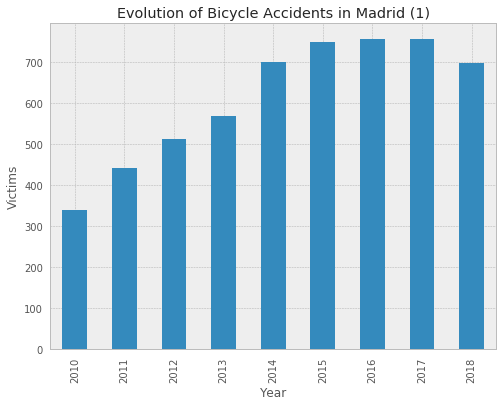

In [171]:
# Count victims per year
vict_per_year = df["District"].resample("A").count()
# Plot the data
fig = plt.figure()
ax = plt.axes()
ax.set(title="Evolution of Bicycle Accidents in Madrid (1)", xlabel="Year", ylabel="Victims")
vict_per_year.plot(ax=ax, kind="bar")


EXPLAIN TREND

### Weekly Victims Count

now, Analyze the avg people involved over the course of a year.

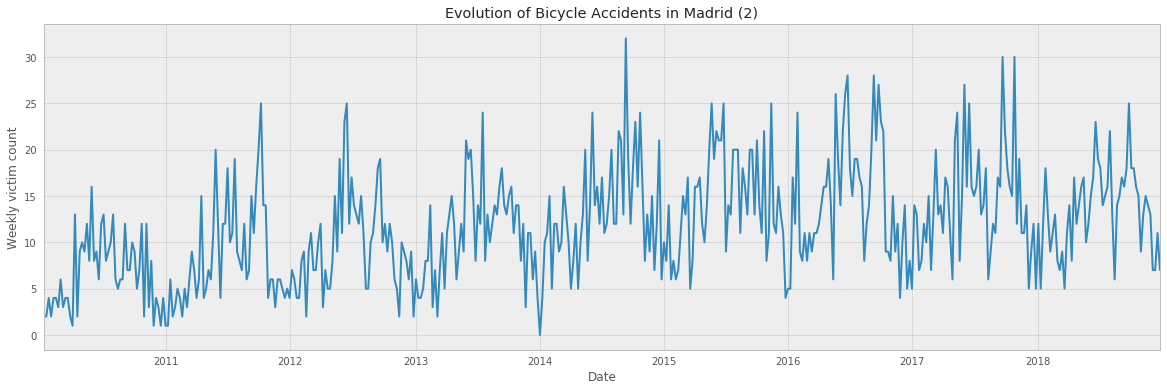

In [182]:
# Count the victims per week
vict_per_week = df["District"].resample("W").count()
# Plot data
fig = plt.figure()
ax = plt.axes()
ax.set(title="Evolution of Bicycle Accidents in Madrid (2)", xlabel="Date", ylabel="Weekly victim count")
vict_per_week.plot(ax=ax, figsize=(20, 6))

Rolling avg of 15 days

In [ ]:
Rolling avg code

now, Analyze the avg weekly people involved over the course of a year.

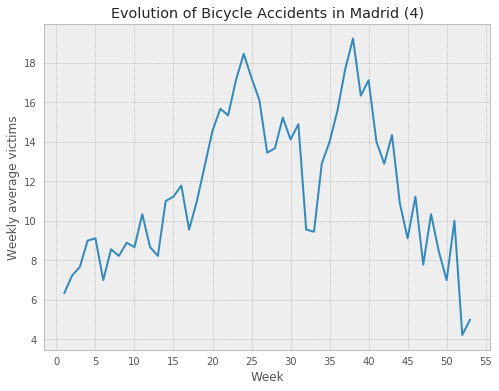

In [205]:
# Compute the weekly avg
avg_by_week = vict_per_week.groupby(vict_per_week.index.week).mean()
#Plot the data
fig = plt.figure()
ax = plt.axes()
ax.set(title="Evolution of Bicycle Accidents in Madrid (4)", xlabel="Week", ylabel="Weekly average victims")
avg_by_week.plot(ax=ax)
# Format the x ticks labels
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
